Considere uma cadeia unidimensional composta por N átomos, todos com a mesma massa m, conectados por molas que alternam entre duas constantes elásticas: k e três vezes k. O sistema deve ser analisado sob condições de contorno com pontas livres, ou seja, as extremidades da cadeia não estão presas.

In [1]:
import numpy as np
from numpy import array 
from scipy.linalg import eig 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time 

In [3]:
#================================ Condições Iniciais =====================================
m=1.0 #Massa dos atomos
k1= 1.0 #Constante de mola do primeiro oscilador
k2= 3*k1 #Constante de mola do segundo oscilador
N= 1000 #Número de atomos 

In [4]:


M = m * np.eye(N)

#=========================================== Metodo para K1 ===========================================

# Matriz tridiagonal NxN para K1
K1 = k1 * (2 * np.eye(N) - np.eye(N, k=1) - np.eye(N, k=-1))

# Resolver problema de autovalor
  # Simula algum tempo de processamento
autovalores1, autovetores1 = eig(K1, M)
frequencias1 = np.sqrt(np.abs(autovalores1))
idx1 = np.argsort(frequencias1)
frequencias_ordenadas1 = frequencias1[idx1]
autovetores_ordenados1 = autovetores1[:, idx1].real
autovetores_norm1 = autovetores_ordenados1 / np.linalg.norm(autovetores_ordenados1, axis=0)


#=========================================== Metodo para K2 ===========================================

K2 = k2 * (2 * np.eye(N) - np.eye(N, k=1) - np.eye(N, k=-1))

# Resolver problema de autovalor
autovalores2, autovetores2 = eig(K2, M)
frequencias2 = np.sqrt(np.abs(autovalores2))
idx2 = np.argsort(frequencias2)
frequencias_ordenadas2 = frequencias2[idx2]
autovetores_ordenados2 = autovetores2[:, idx2].real
autovetores_norm2 = autovetores_ordenados2 / np.linalg.norm(autovetores_ordenados2, axis=0)



<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
C:\Users\p.mazzola\AppData\Local\Temp\ipykernel_6700\3970672762.py:7: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Densidade de estados por $\omega^2$')


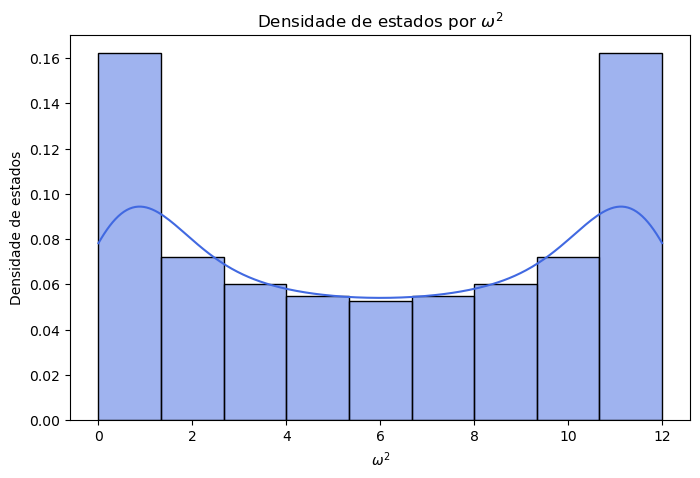

In [5]:
#=========================================== Plotando os resultados ===========================================
plt.figure(figsize=(8, 5))
omega2 = frequencias_ordenadas2**2
sns.histplot(omega2, bins=9, kde=True, stat='density', color='royalblue')
plt.xlabel(r'$\omega^2$')
plt.ylabel('Densidade de estados')
plt.title('Densidade de estados por $\omega^2$')
plt.show()